In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_excel(r'ordens.xlsx', sheet_name="Coordenadas")
df = df.iloc[1:, :]

coordenadas = pd.DataFrame()
coordenadas["Latitude"] = df.iloc[:, 5]
coordenadas["Longitude"] = df.iloc[:, 6]
coordenadas.head()

,Latitude,Longitude
1,40.322223,-8.620587
2,40.322371,-8.620558
3,40.322282,-8.620559
4,40.322319,-8.620449
5,40.322595,-8.620695


In [4]:
BBox = ((coordenadas["Longitude"].min(),   coordenadas["Longitude"].max(),      
         coordenadas["Latitude"].min(), coordenadas["Latitude"].max()))

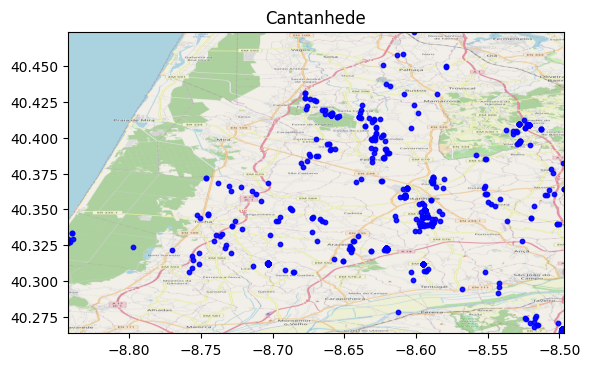

In [5]:
ruh_m = plt.imread('map.png')

fig, ax = plt.subplots()
ax.scatter(coordenadas["Longitude"], coordenadas["Latitude"], zorder=2, alpha= 0.9, c='b', s=10)
ax.set_title('Cantanhede')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

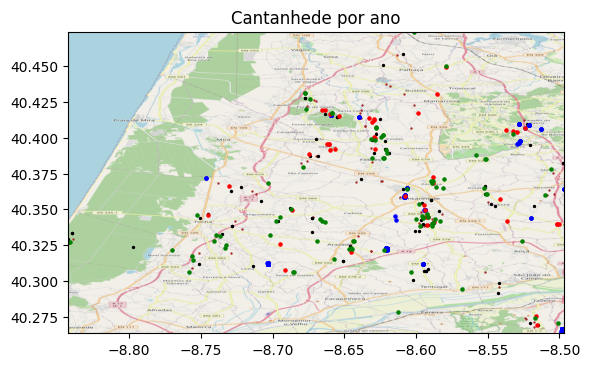

In [6]:

coordenadas["Data"] = df.iloc[:, 1]
coordenadas["Data"]= pd.to_datetime(coordenadas["Data"])
coordenadas["Year"]= coordenadas["Data"].dt.year
fig, ax = plt.subplots()
fig.set_figheight(100)
year = 2021
ax.scatter(coordenadas["Longitude"][coordenadas.Year == 2018], coordenadas["Latitude"][coordenadas.Year == 2018], zorder=2, alpha= 1, c='blue', s=5)
ax.scatter(coordenadas["Longitude"][coordenadas.Year == 2019], coordenadas["Latitude"][coordenadas.Year == 2019], zorder=2, alpha= 1, c='red', s=5)
ax.scatter(coordenadas["Longitude"][coordenadas.Year == 2020], coordenadas["Latitude"][coordenadas.Year == 2020], zorder=2, alpha= 1, c='green', s=5)
ax.scatter(coordenadas["Longitude"][coordenadas.Year == 2021], coordenadas["Latitude"][coordenadas.Year == 2021], zorder=1, alpha= 1, c='brown', s=0.5)
ax.scatter(coordenadas["Longitude"][coordenadas.Year == 2022], coordenadas["Latitude"][coordenadas.Year == 2022], zorder=1, alpha= 1, c='black', s=2)

ax.set_title('Cantanhede por ano')
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [7]:
groupedByYear = coordenadas.groupby("Year").agg({'count'})
groupedByYear.head()


,Latitude,Longitude,Data
,count,count,count
Year,,,
2018,1259,1259,1259
2019,47,47,47
2020,87,87,87
2021,64,64,64
2022,79,79,79


In [71]:
dfIntervencoes = pd.read_excel(r'ordens.xlsx', sheet_name="Intervenções")
dfIntervencoes = dfIntervencoes.iloc[1:, :]
intervencoes = pd.DataFrame()

intervencoes["data"] = pd.to_datetime(dfIntervencoes.iloc[:, 2])
intervencoes["year"] = intervencoes["data"].dt.year
intervencoes["month"] = intervencoes["data"].dt.month

intervencoes.head()

,data,year,month
1,2022-10-18 16:46:45,2022,10
2,2022-10-18 16:47:14,2022,10
3,2022-10-18 08:48:57,2022,10
4,2022-10-18 08:40:05,2022,10
5,2022-10-17 19:03:02,2022,10


In [72]:
intervencoesGroupedYear = pd.DataFrame()

intervencoesGroupedYear = intervencoes.groupby('year')
aggSum = pd.DataFrame()
aggSum = intervencoesGroupedYear.agg({'count'})
aggSum.head()

,data,month
,count,count
year,,
2018,208,208
2019,247,247
2020,377,377
2021,437,437
2022,341,341


In [10]:
intervencoesGroupedMonth = pd.DataFrame()

intervencoesGroupedMonth = intervencoes.groupby('month')
aggSumMonth = pd.DataFrame()
aggSumMonth = intervencoesGroupedMonth.agg({'count'})
aggSumMonth.head(20)

,data,year
,count,count
month,,
1,117,117
2,109,109
3,92,92
4,124,124
5,115,115
6,168,168
7,186,186
8,166,166


In [73]:
groupByYearAndMonth = intervencoes.groupby(['year', 'month']).agg({'count'})
groupByYearAndMonth.head(12 * 5)

data
           count
year month      
2018 1        25
     2        27
     3        16
     4         4
     5         3
     6        15
     7        18
     8         7
     9        36
     10       27
     11       17
     12       13
2019 1         6
     2        20
     3         7
     4        22
     5        18
     6        26
     7        31
     8        28
     9        28
     10       28
     11       25
     12        8
2020 1        18
     2         9
     3        14
     4        23
     5        23
     6        55
     7        46
     8        42
     9        36
     10       38
     11       37
     12       36
2021 1        41
     2        33
     3        31
     4        39
     5        28
     6        31
     7        54
     8        38
     9        46
     10       41
     11       29
     12       26
2022 1        27
     2        20
     3        24
     4        36
     5        43
     6        41
     7        37
     8        51
     9        34
     10       28

Timestamp('2020-05-31 22:29:42.947617024')

In [82]:
# Media por meses
#meanByMonth.reset_index('month', inplace = True)

meanBymonth = pd.DataFrame()
meanByMonth = intervencoes.groupby(['month', 'year']).agg({'count', 'mean', 'max' , 'min'})
meanByMonth.head(12 * 5)

data                      \
                           min                 max   
month year                                           
1     2018 2018-01-14 18:36:52 2018-01-31 16:19:14   
      2019 2019-01-09 08:30:02 2019-01-15 17:03:02   
      2020 2020-01-07 15:47:23 2020-01-30 11:46:34   
      2021 2021-01-04 15:40:30 2021-01-29 17:02:59   
      2022 2022-01-03 15:36:46 2022-01-31 15:12:18   
2     2018 2018-02-01 06:47:07 2018-02-14 16:29:10   
      2019 2019-02-01 10:18:35 2019-02-21 16:01:21   
      2020 2020-02-06 16:42:05 2020-02-24 14:32:43   
      2021 2021-02-02 17:08:11 2021-02-26 16:20:50   
      2022 2022-02-01 10:27:12 2022-02-26 15:58:42   
3     2018 2018-03-04 19:17:08 2018-03-21 19:14:40   
      2019 2019-03-21 17:10:18 2019-03-31 21:06:50   
      2020 2020-03-11 13:24:20 2020-03-31 16:56:05   
      2021 2021-03-01 13:36:56 2021-03-31 16:25:17   
      2022 2022-03-02 16:03:15 2022-03-31 15:52:42   
4     2018 2018-04-02 22:45:33 2018-04-03 00:21:30   
      2019 2019-04-15 08:01:39 2019-04-29 16:28:47   
      2020 2020-04-02 10:16:40 2020-04-30 16:52:03   
      2021 2021-04-01 16:37:26 2021-04-30 16:49:47   
      2022 2022-04-01 10:48:38 2022-04-30 18:49:14   
5     2018 2018-05-25 16:38:04 2018-05-30 17:01:41   
      2019 2019-05-07 16:23:01 2019-05-24 16:03:14   
      2020 2020-05-04 14:20:16 2020-05-28 11:46:00   
      2021 2021-05-05 16:00:49 2021-05-31 18:09:17   
      2022 2022-05-02 09:46:35 2022-05-31 16:27:09   
6     2018 2018-06-01 14:58:53 2018-06-28 16:10:18   
      2019 2019-06-03 10:02:57 2019-06-28 16:20:17   
      2020 2020-06-01 14:25:19 2020-06-29 15:56:14   
      2021 2021-06-01 10:15:56 2021-06-29 16:48:51   
      2022 2022-06-01 15:59:12 2022-06-30 16:50:29   
7     2018 2018-07-06 08:29:50 2018-07-19 14:44:27   
      2019 2019-07-01 11:34:20 2019-07-31 15:44:50   
      2020 2020-07-01 08:42:33 2020-07-31 16:19:15   
      2021 2021-07-01 17:14:20 2021-07-30 16:49:21   
      2022 2022-07-01 14:02:27 2022-07-31 18:46:58   
8     2018 2018-08-10 17:19:31 2018-08-31 16:23:03   
      2019 2019-08-02 16:14:11 2019-08-28 11:50:03   
      2020 2020-08-03 16:29:55 2020-08-31 17:40:56   
      2021 2021-08-01 12:19:07 2021-08-31 15:49:42   
      2022 2022-08-01 14:39:39 2022-08-31 19:27:28   
9     2018 2018-09-03 15:51:33 2018-09-28 15:22:32   
      2019 2019-09-04 16:45:29 2019-09-30 15:54:25   
      2020 2020-09-01 11:33:59 2020-09-30 16:48:25   
      2021 2021-09-01 10:54:57 2021-09-30 22:25:14   
      2022 2022-09-01 17:08:51 2022-09-30 14:04:53   
10    2018 2018-10-03 13:03:50 2018-10-29 16:18:48   
      2019 2019-10-01 13:26:15 2019-10-30 10:14:56   
      2020 2020-10-01 10:45:17 2020-10-30 17:50:30   
      2021 2021-10-01 16:12:03 2021-10-30 18:34:48   
      2022 2022-10-03 13:11:52 2022-10-18 16:47:14   
11    2018 2018-11-05 16:55:08 2018-11-30 16:00:24   
      2019 2019-11-04 14:53:43 2019-11-29 15:52:42   
      2020 2020-11-02 08:30:12 2020-11-27 15:43:49   
      2021 2021-11-08 13:03:27 2021-11-30 16:44:02   
12    2018 2018-12-05 13:52:11 2018-12-20 16:28:27   
      2019 2019-12-02 14:27:17 2019-12-27 15:22:55   
      2020 2020-12-02 14:58:28 2020-12-30 16:59:06   
      2021 2021-12-02 16:21:18 2021-12-30 16:57:02   

                                                
                                    mean count  
month year                                      
1     2018 2018-01-18 22:50:06.320000000    25  
      2019 2019-01-12 11:20:07.833333504     6  
      2020 2020-01-19 01:10:37.722222080    18  
      2021 2021-01-13 09:07:38.902439168    41  
      2022 2022-01-18 04:34:58.740740608    27  
2     2018 2018-02-04 07:57:57.333333248    27  
      2019 2019-02-13 03:59:08.550000128    20  
      2020 2020-02-15 17:37:20.111111168     9  
      2021 2021-02-14 18:33:10.575757568    33  
      2022 2022-02-17 22:04:04.400000000    20  
3     2018 2018-03-13 02:31:52.062500096    16  
      2019 2019-03-30 09:56:12.285714432     

In [49]:
meanByWeekDay = pd.DataFrame()
meanByWeekDay["month"] = intervencoes["month"]
meanByWeekDay["dayofweek"] = intervencoes["data"].dt.dayofweek
groupedByWeekDay = meanByWeekDay.groupby("dayofweek").agg({'count', 'mean', 'max' , 'min'})
groupedByWeekDay.head(8)

month                    
            min max      mean count
dayofweek                          
0             1  12  6.878893   289
1             1  12  6.509740   308
2             1  12  6.674267   307
3             1  12  6.586957   322
4             1  12  7.038328   287
5             2  10  6.232558    43
6             1  12  5.425926    54

In [95]:
testMeanMonthlyCount = pd.DataFrame()
testMeanMonthlyCount = intervencoes.groupby(['year','month']).count().groupby('month').agg( {'mean', 'max', 'min'})
testMeanMonthlyCount.head(12 * 5)

data           
       min max   mean
month                
1        6  41  23.40
2        9  33  21.80
3        7  31  18.40
4        4  39  24.80
5        3  43  23.00
6       15  55  33.60
7       18  54  37.20
8        7  51  33.20
9       28  46  36.00
10      27  41  32.40
11      17  37  27.00
12       8  36  20.75

In [94]:
testMeanYearCount = pd.DataFrame()
testMeanYearCount = intervencoes.groupby(['year','month']).count().groupby('year').agg( {'mean', 'max', 'min'})
testMeanYearCount.head(12 * 5)

data               
      min max       mean
year                    
2018    3  36  17.333333
2019    6  31  20.583333
2020    9  55  31.416667
2021   26  54  36.416667
2022   20  51  34.100000